<a href="https://colab.research.google.com/github/ArrogantNobody/CV_study/blob/master/6_image_geometric_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

放缩
放缩仅仅改变图像尺寸。opencv提供的函数cv2.resize()可以实现此功能。图片的尺寸可以手动指定，或者指定缩放因子。可以不同的插值运算方法。在缩放时推荐的插值运算方法是 cv2.INTER_AREA，在扩展时推荐使用v2.INTER_CUBIC（慢）和cv2.INTER_LINEAR。默认情况下改变图像大小的操作使用插值方法是cv2.INTER_LINEAR，可以使用任意一种方法改变图像尺寸。

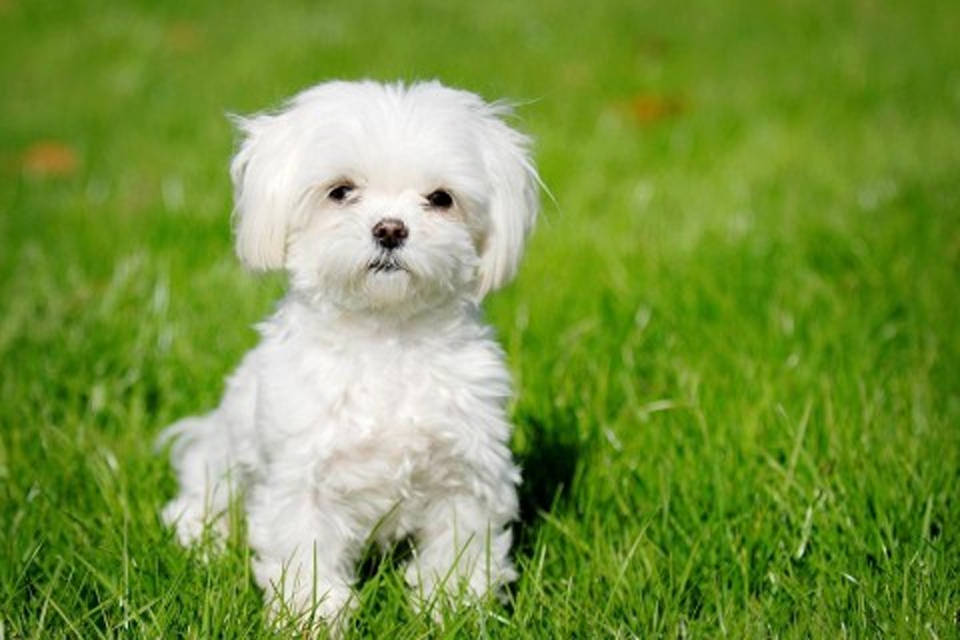

In [3]:
img = cv2.imread('/content/drive/MyDrive/CV_study/images/dog.jpeg')
# height, width = img.shape[:2]
# res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
res1 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2_imshow(res1)

平移就是移动对象位置。如果你知道移动方向(x,y)，移动距离是(tx,ty)，可以创建如下矩阵。
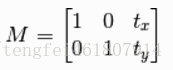

可以将矩阵放进numpy的数组当中，存为np.float32类型，并将其传入cv2.warpAffine() 函数当中。下面例子移动了(100,50)。

在只设置前三个参数的情况下，如 cv2.warpAffine(img,M,(rows,cols))可以实现基本的仿射变换效果，但会出现“黑边”现象, 参数默认为0可设置

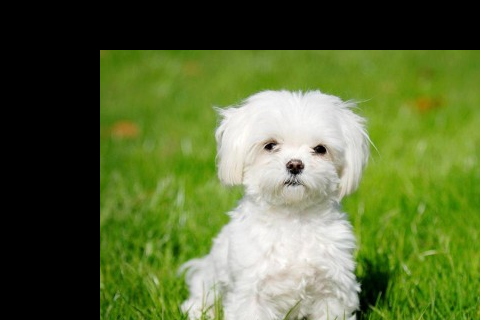

In [5]:
rows,cols,channel = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))#,borderValue=(255,255,255))
cv2_imshow(dst)

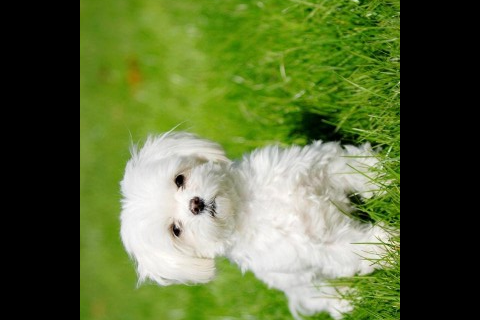

In [8]:
M=cv2.getRotationMatrix2D((cols/2,rows/2),90,1)#选转中心，选转角度，缩放尺度
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(dst)

仿射变换中，图中的平行线变换后依然平行。创建仿射变换矩阵需要在图像中找三个点和这三个点在输出图像的位置。使用cv2.getAffineTransform函数创建仿射变换矩阵，矩阵2*3,矩阵会被传递给cv2.warpAffine函数



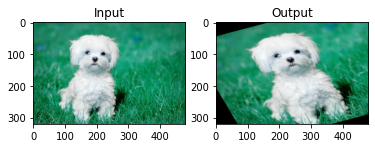

In [9]:
from matplotlib import pyplot as plt
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

透视变换需要3*3的矩阵，透视变换后直线还是直线，建立透视矩阵需要在图像上找4个点和在输出图像上的对应位置，四个点任意三个不能共线cv2.getPerspectiveTransform() 构建矩阵，并将矩阵传递到函数cv2.warpPerspective

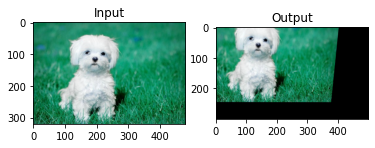

In [13]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(500,300))#image shape

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()